In [1]:
pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
 

In [51]:
from pycaret.time_series import TSForecastingExperiment
exp= TSForecastingExperiment()

In [52]:
import pandas as pd
import numpy as np
from pycaret.datasets import get_data
data = pd.read_csv('/content/alappuzha.csv')
data['date'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MO'].astype(str), format='%Y-%m')
data['date'] = data['date'].dt.strftime('%m-%d-%Y')
data.drop(['YEAR', 'MO'], axis=1, inplace=True)
potential_outliers = (data['T2M'] < -20) | (data['T2M'] > 40) | (data['RH2M'] < 0) | (data['RH2M'] > 100) | (data['WS2M'] < 0) | (data['WS2M'] > 50) | (data['PRECTOTCORR'] < 0)
outlier_indices = np.where(potential_outliers)[0]
data = data[~potential_outliers]
data = data.set_index('date')
data.index = pd.DatetimeIndex(data.index)


<Axes: xlabel='date'>

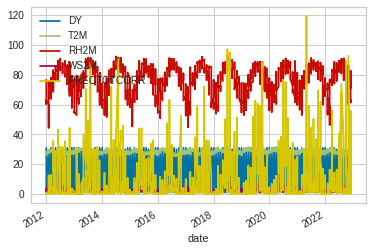

In [53]:
data.plot()

In [54]:
print(data.index.duplicated())


[False  True  True ...  True  True  True]


In [55]:
data = data[~data.index.duplicated(keep='first')]

In [56]:
# with functional API
from pycaret.time_series import *
setup(data, fh = 7, fold = 3, session_id = 123,target='PRECTOTCORR',seasonal_period=12)
# with new object-oriented API
exp.setup(data, fh = 10, fold = 3, session_id = 123,target='PRECTOTCORR')

,Description,Value
0,session_id,123
1,Target,PRECTOTCORR
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(132, 5)"
5,Transformed data shape,"(132, 5)"
6,Transformed train set shape,"(125, 5)"
7,Transformed test set shape,"(7, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Description,Value
0,session_id,123
1,Target,PRECTOTCORR
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(132, 5)"
5,Transformed data shape,"(132, 5)"
6,Transformed train set shape,"(122, 5)"
7,Transformed test set shape,"(10, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [57]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,132.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,6.961439
3,Summary,Statistics,Transformed,Median,,2.695
4,Summary,Statistics,Transformed,Standard Deviation,,12.402617
5,Summary,Statistics,Transformed,Variance,,153.824904
6,Summary,Statistics,Transformed,Kurtosis,,20.65172
7,Summary,Statistics,Transformed,Skewness,,4.010629
8,Summary,Statistics,Transformed,# Distinct Values,,108.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",27.934832


In [58]:
# functional API
plot_model(plot = 'ts')
# object-oriented API
exp.plot_model(plot = 'ts')

In [59]:
# cross-validation plot
plot_model(plot = 'cv')

In [60]:
# ACF plot
plot_model(plot = 'acf')

In [61]:
# Diagnostics plot
plot_model(plot = 'diagnostics')


In [62]:
# functional API
best = compare_models()
# object-oriented API
best = exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6031,0.3927,4.3764,5.5125,7.1116,1.0538,-1.3952,0.2567
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6102,0.3997,4.4285,5.6146,6.4020,1.0773,-1.6273,0.2600
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.6228,0.4392,4.5099,6.1614,5.1870,1.0517,-1.5171,0.2867
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6332,0.4123,4.5959,5.7914,6.9622,1.0566,-1.8273,0.4033
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6332,0.4123,4.5959,5.7914,6.9621,1.0566,-1.8273,0.3567
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6379,0.4154,4.6301,5.8349,6.9456,1.0642,-1.8707,0.2533
auto_arima,Auto ARIMA,0.6408,0.4410,4.6523,6.1986,4.7935,1.1435,-2.4315,0.2133
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6548,0.4655,4.7373,6.5219,3.8601,1.2300,-1.5234,0.6233
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6584,0.4294,4.7711,6.0202,10.3016,1.0476,-1.2704,0.4933
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6823,0.4640,4.9316,6.4887,6.0285,1.3203,-1.0681,0.2967


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.5563,0.3716,4.0925,5.3509,32785223073709.2344,1.0838,0.2796,0.1900
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.5740,0.4071,4.2238,5.8875,135925459594069.4844,0.9021,0.1332,0.4500
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.5740,0.3754,4.2345,5.4217,169624200184906.2188,1.0658,0.2821,0.3133
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5820,0.3867,4.2942,5.5902,34740689025275.4180,1.0659,0.2412,0.3267
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.5949,0.3881,4.3884,5.6034,157714041936595.6562,1.1165,0.2328,0.5567
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.5949,0.3881,4.3884,5.6034,157710102576974.8438,1.1165,0.2328,0.3267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.5967,0.3887,4.4013,5.6117,168646640337323.7188,1.1322,0.2300,0.3267
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6315,0.4074,4.6542,5.8766,272054041994491.4062,1.2179,0.1500,0.3467
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6322,0.4078,4.6589,5.8820,273906010392757.3438,1.2213,0.1483,0.3200
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6322,0.4078,4.6589,5.8820,273906010392756.3125,1.2213,0.1483,0.5733


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [68]:
# create fbprophet model
auto_arima = create_model('auto_arima')
print(auto_arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2020-08'], dtype='period[M]', name='date')",0.4941,0.3520,3.6929,5.0969,8.4225,1.6717,-6.8108
1,"PeriodIndex(['2021-03'], dtype='period[M]', name='date')",0.5836,0.3628,4.1958,5.1074,1.1698,0.6419,-0.4772
2,"PeriodIndex(['2021-10'], dtype='period[M]', name='date')",0.8449,0.6082,6.0684,8.3916,4.7882,1.1170,-0.0064
Mean,nan,0.6408,0.4410,4.6523,6.1986,4.7935,1.1435,-2.4315
SD,nan,0.1489,0.1183,1.0221,1.5507,2.9609,0.4208,3.1026


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AutoARIMA(random_state=123, suppress_warnings=True)


In [69]:
tuned_auto_arima = tune_model(auto_arima)
print(tuned_auto_arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2020-08'], dtype='period[M]', name='date')",0.4941,0.3520,3.6929,5.0969,8.4225,1.6717,-6.8108
1,"PeriodIndex(['2021-03'], dtype='period[M]', name='date')",0.5836,0.3628,4.1958,5.1074,1.1698,0.6419,-0.4772
2,"PeriodIndex(['2021-10'], dtype='period[M]', name='date')",0.8449,0.6082,6.0684,8.3916,4.7882,1.1170,-0.0064
Mean,nan,0.6408,0.4410,4.6523,6.1986,4.7935,1.1435,-2.4315
SD,nan,0.1489,0.1183,1.0221,1.5507,2.9609,0.4208,3.1026


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


AutoARIMA(random_state=123, suppress_warnings=True)


In [76]:
plot_model(tuned_auto_arima,plot = 'forecast')

In [83]:
# forecast in unknown future
plot_model(tuned_auto_arima, plot = 'forecast', data_kwargs = {'fh' : 7})

In [91]:
# in-sample plot
plot_model(tuned_auto_arima, plot = 'insample')

In [92]:
# residuals plot
plot_model(tuned_auto_arima, plot = 'residuals')

In [89]:
# finalize model
final_best = finalize_model(tuned_auto_arima)
# generate predictions
predict_model(tuned_auto_arima, fh = 7)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,1.9247,1.6168,14.0631,22.1379,1.2754,0.8269,0.1193


,y_pred
2022-06,9.7740
2022-07,12.4171
2022-08,16.3042
2022-09,14.6577
2022-10,10.6112
2022-11,9.2744
2022-12,2.0957


In [90]:
# save the model
save_model(final_best, 'my_best_model')


Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 AutoARIMA(random_state=123,
                                                                           suppress_warnings=True))]))]),
 'my_best_model.pkl')